In [1]:
import numpy as np
from score_recognition import get_digit_frames, crop_score
import cv2
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.
W0128 16:38:32.441248  6896 module_wrapper.py:137] From C:\Users\lmura\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0128 16:38:33.918958  6896 module_wrapper.py:137] From C:\Users\lmura\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0128 16:38:34.034662  6896 deprecation.py:506] From C:\Users\lmura\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0128 16:38:34.759662  6896 module_wrapper.py:137] From C:\Users\lm

In [2]:
train_recording_path = r"D:\Wormax\data\nn\2020-01-28 04-25-57.mp4"
test_recording_path = r"D:\Wormax\data\nn\output.mp4"

In [3]:
def generator(recording_path, batch_size=32, buffer_size=400):
    cap = cv2.VideoCapture(recording_path)
    buffer = []
    ret = True
    while True:
        while ret and len(buffer) < buffer_size:
            for j in range(5):
                ret, frame = cap.read()
            frame = frame / 255
            
            number_frame = crop_score(frame)
            digit_frames = get_digit_frames(number_frame)
            
            if digit_frames[5].mean() < 0.15:
                continue
                
            # First 2 digits are always blank, last 2 always exist
            buffer += [[digit_frames[0], 0], [digit_frames[1], 0], [digit_frames[4], 1], [digit_frames[5], 1]]
                
        random.shuffle(buffer)
        x, y = zip(*buffer[:batch_size])
        yield np.array(x), np.array(y)
        buffer = buffer[batch_size:]

In [73]:
from tqdm import tqdm_notebook
from sklearn.linear_model import LogisticRegression
from sklearn import svm

n = 4000
x_train, y_train = next(generator(train_recording_path, n, n))
x_test, y_test = next(generator(test_recording_path, n, n))

x_train = x_train.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)
clf = svm.SVC(gamma=0.001, C=100.).fit(x_train, y_train)

# clf = LogisticRegression(random_state=0)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.995
0.98125


1 0


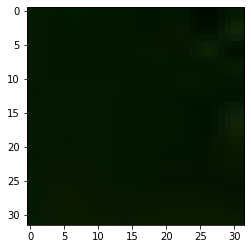

1 0


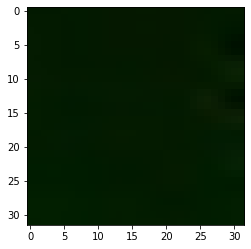

1 0


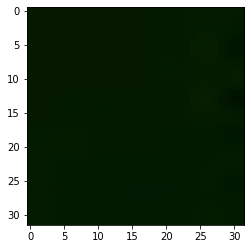

1 0


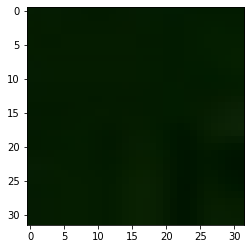

0 1


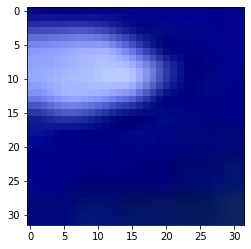

1 0


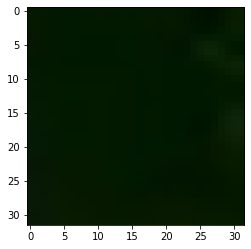

1 0


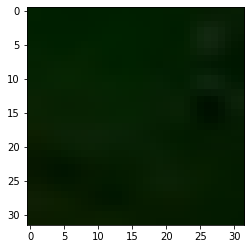

1 0


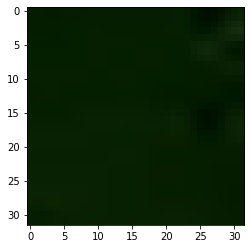

1 0


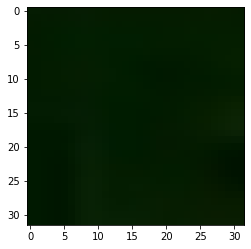

1 0


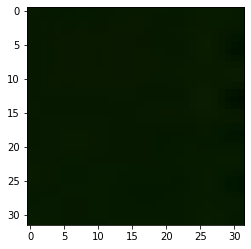

1 0


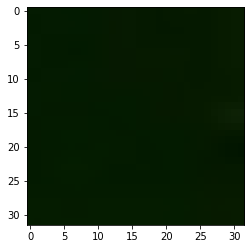

1 0


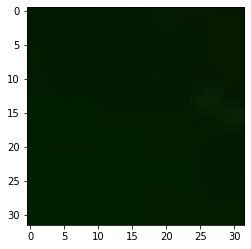

1 0


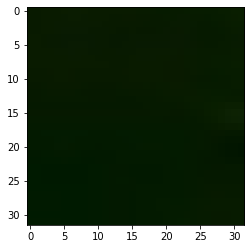

1 0


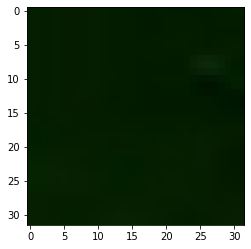

1 0


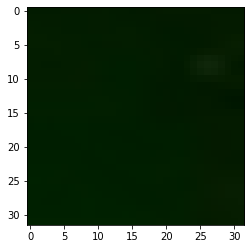

1 0


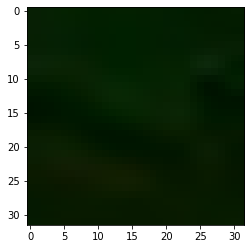

1 0


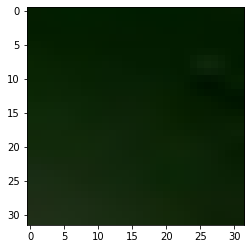

0 1


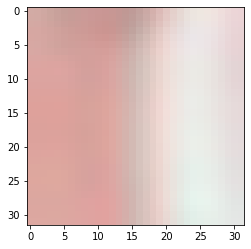

0 1


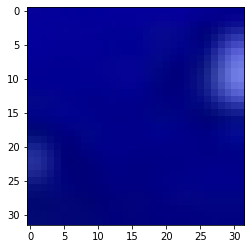

1 0


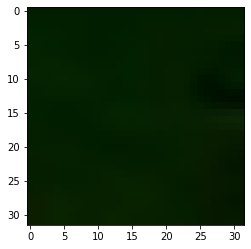

1 0


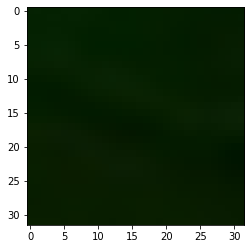

1 0


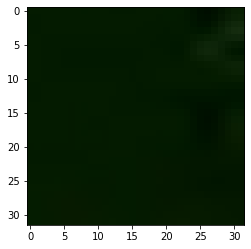

0 1


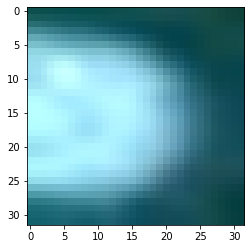

1 0


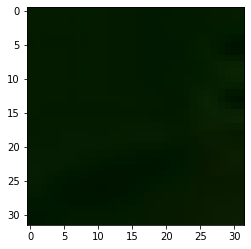

1 0


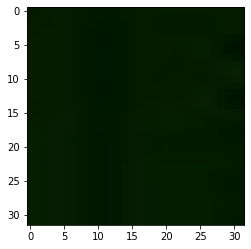

1 0


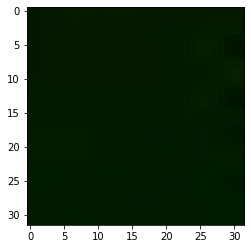

1 0


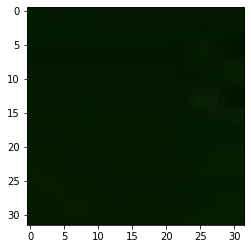

1 0


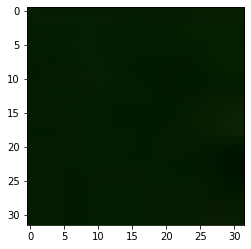

1 0


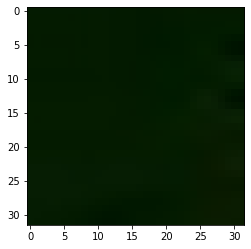

1 0


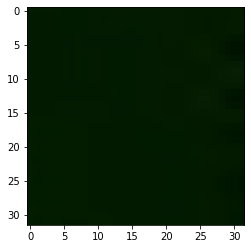

1 0


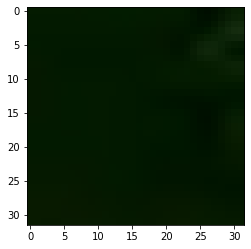

1 0


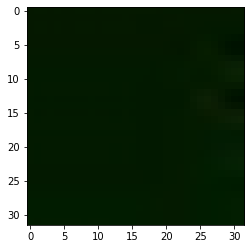

1 0


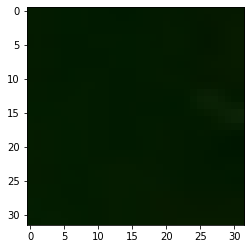

1 0


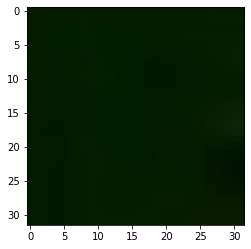

1 0


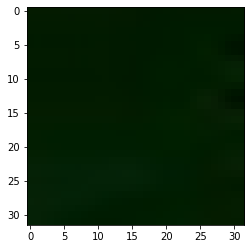

1 0


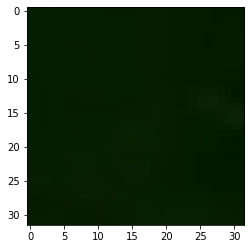

1 0


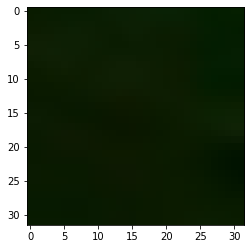

1 0


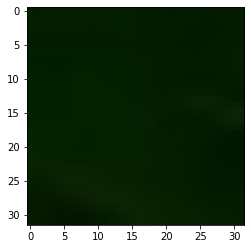

0 1


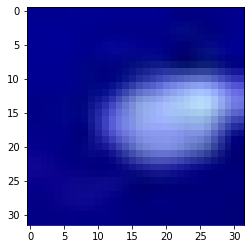

1 0


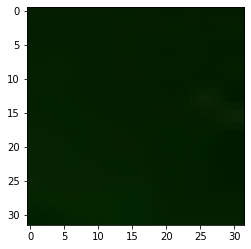

1 0


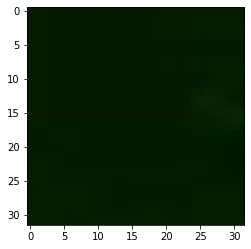

1 0


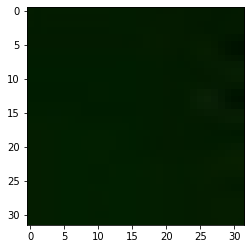

1 0


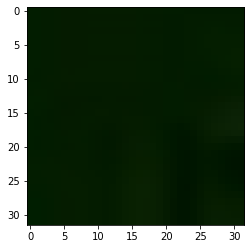

1 0


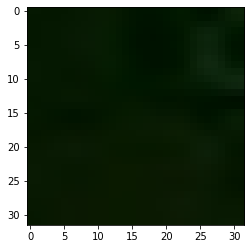

1 0


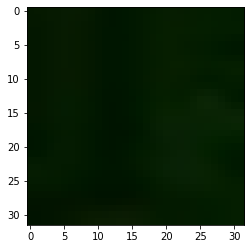

1 0


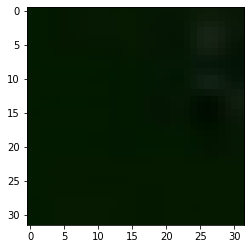

1 0


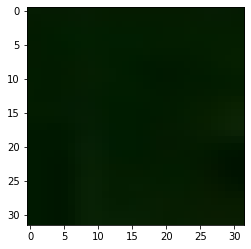

1 0


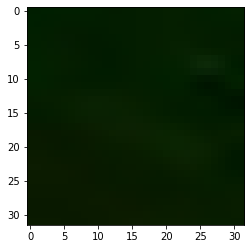

0 1


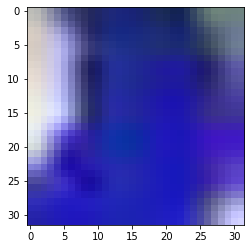

0 1


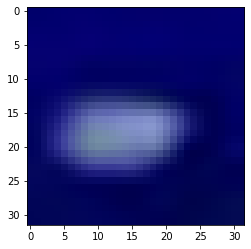

1 0


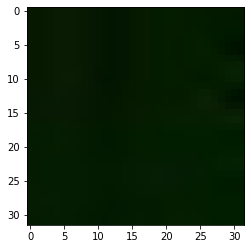

1 0


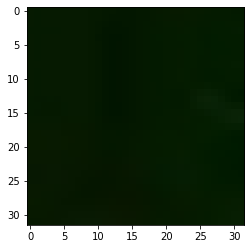

1 0


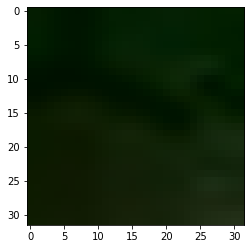

1 0


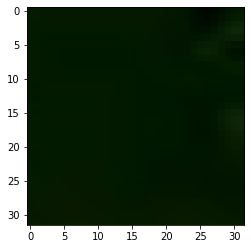

1 0


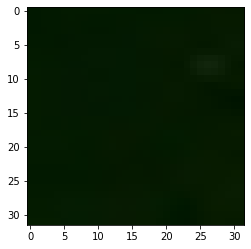

1 0


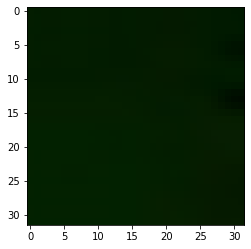

1 0


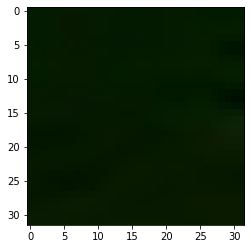

1 0


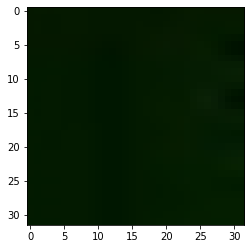

0 1


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [78]:
ans = clf.predict(x_test)
for i in range(len(x_test[ans != y_test])):
    plt.figure()
    print(y_test[ans != y_test][i], ans[ans != y_test][i])
    plt.imshow(x_test[ans != y_test][i].reshape(32,32,3))
    plt.show()

In [89]:
cap = cv2.VideoCapture(recording_path)
buffer = []
ret = True
for i in tqdm_notebook(range(10000)):
    for j in range(20):
        ret, frame = cap.read()
    frame = frame / 255

    number_frame = crop_score(frame)
    digit_frames = get_digit_frames(number_frame)

    if digit_frames[5].mean() < 0.15:
        continue

    # First 2 digits are always blank, last 2 always exist
    buffer += [[digit_frames[0], 0], [digit_frames[1], 0], [digit_frames[4], 1], [digit_frames[5], 1]]

# random.shuffle(buffer)
x, y = zip(*buffer)
x, y = np.array(x), np.array(y)
np.save('x.npy', x)
np.save('y.npy', y)
x.shape

In [4]:
x = np.load('x.npy')
y = np.load('y.npy')

In [5]:
n = 4000
x_test, y_test = next(generator(test_recording_path, n, n))

1 0.0


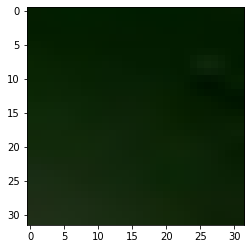

1 0.0


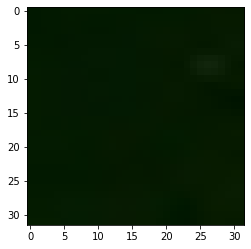

1 0.0


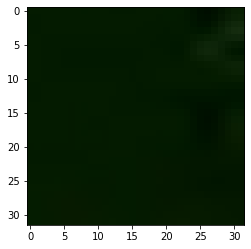

1 0.0


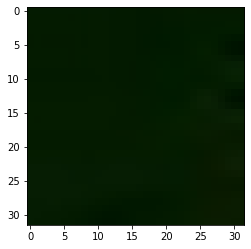

1 0.0


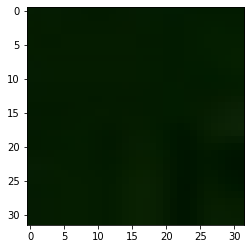

1 0.0


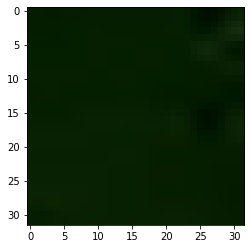

1 0.0


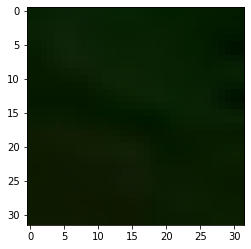

1 0.0


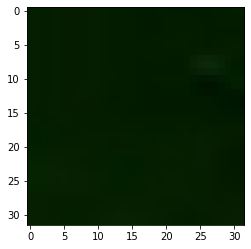

1 0.0


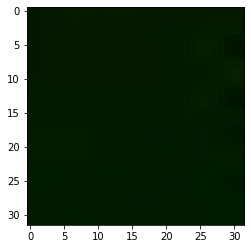

1 0.0


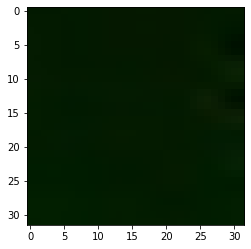

1 0.0


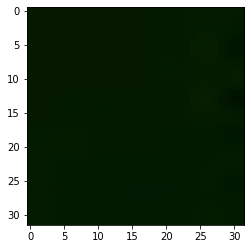

1 0.0


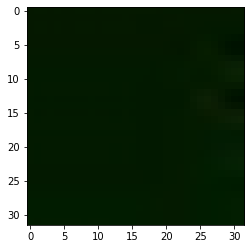

1 0.0


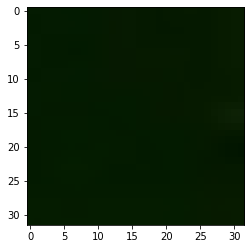

1 0.0


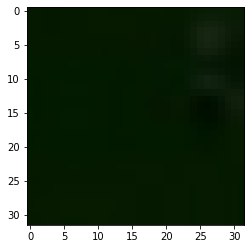

1 0.0


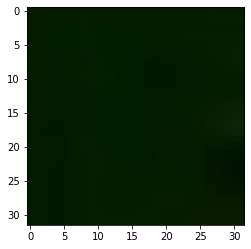

1 0.0


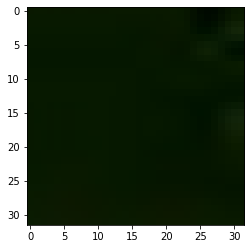

1 0.0


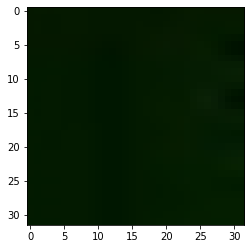

1 0.0


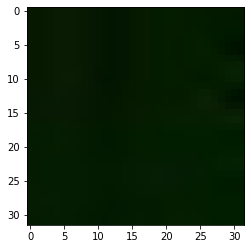

1 0.0


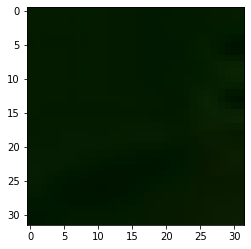

1 0.0


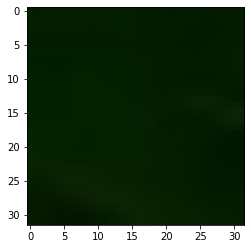

1 0.0


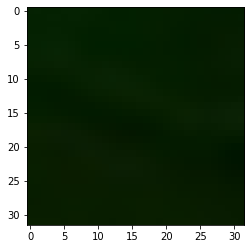

1 0.0


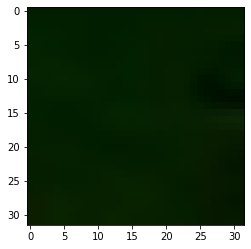

1 0.0


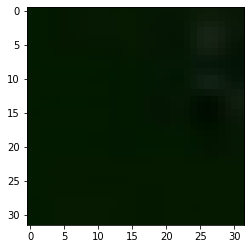

1 0.0


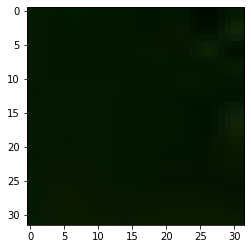

1 0.0


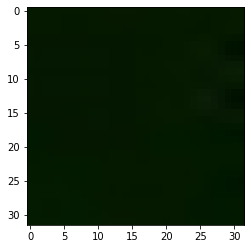

1 0.0


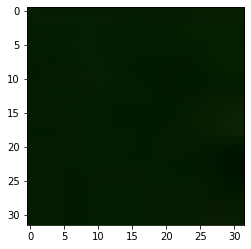

1 0.0


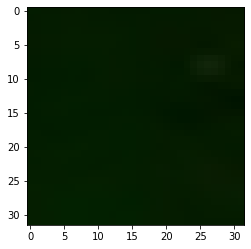

1 0.0


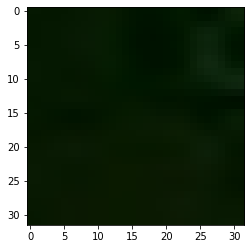

1 0.0


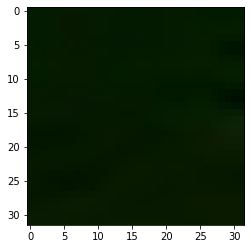

1 0.0


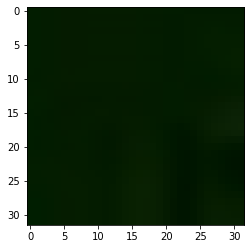

1 0.0


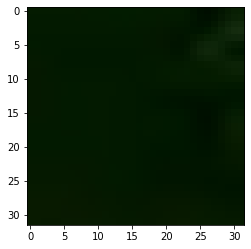

1 0.0


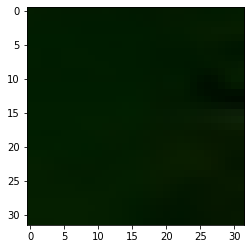

1 0.0


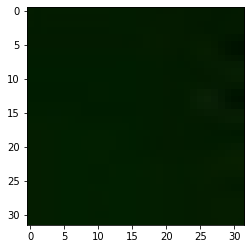

1 0.0


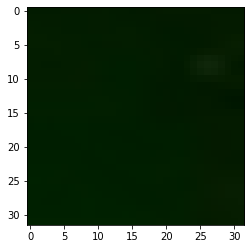

1 0.0


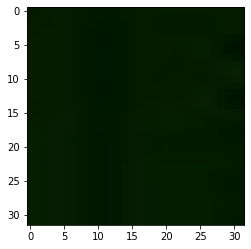

1 0.0


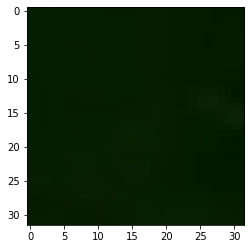

1 0.0


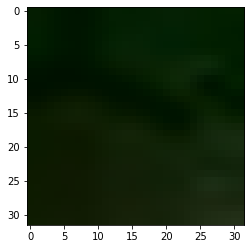

1 0.0


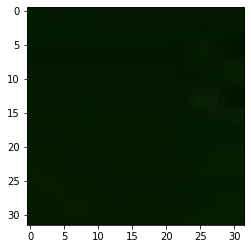

1 0.0


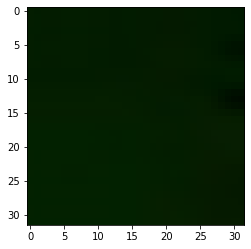

1 0.0


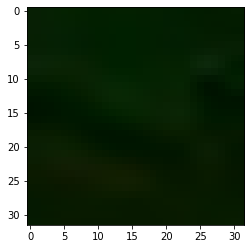

1 0.0


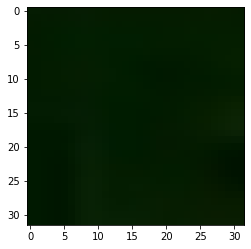

1 0.0


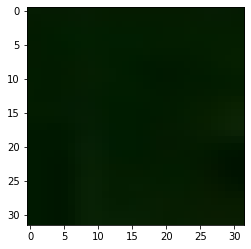

1 0.0


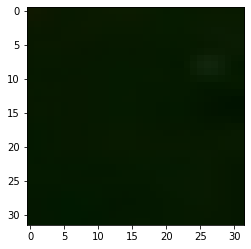

1 0.0


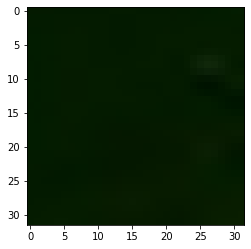

1 0.0


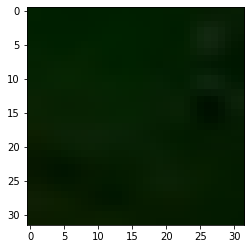

1 0.0


KeyboardInterrupt: 

In [11]:
ans = model.predict(x_test).reshape(-1).round()
for i in range(len(x_test[ans != y_test])):
    plt.figure()
    print(y_test[ans != y_test][i], ans[ans != y_test][i])
    plt.imshow(x_test[ans != y_test][i].reshape(32,32,3))
    plt.show()

In [8]:
ans.shape

(4000, 1)

In [28]:
from tqdm import tqdm_notebook
from sklearn.linear_model import LogisticRegression
from sklearn import svm

x_train = x.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

clf = LogisticRegression(random_state=0).fit(x_train, y)
print(clf.score(x_train, y))
print(clf.score(x_test, y_test))

C:\Users\lmura\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9879746835443038
0.982


In [29]:
from joblib import dump, load
dump(clf, 'empty_digit_classifier.joblib') 

['empty_digit_classifier.joblib']

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001D49497E488> (for post_execute):


KeyboardInterrupt: 

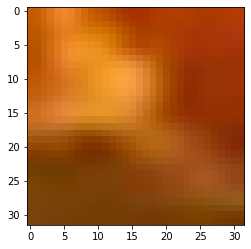

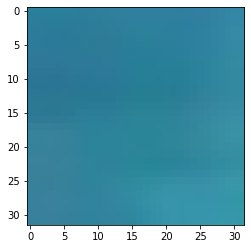

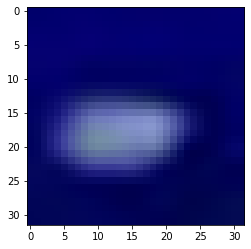

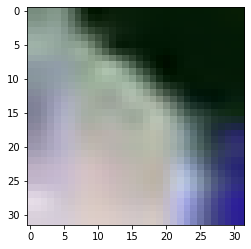

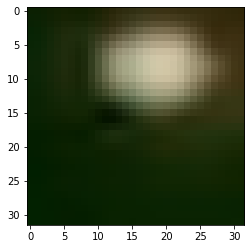

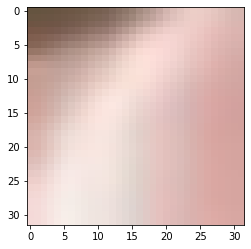

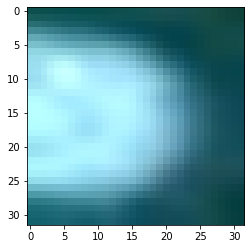

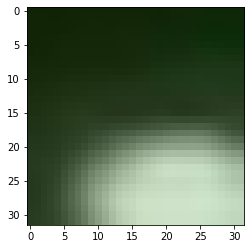

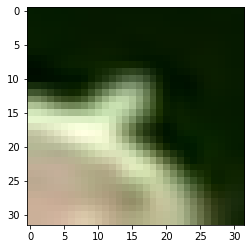

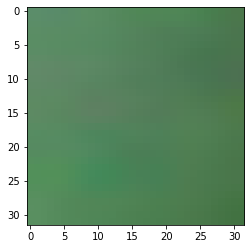

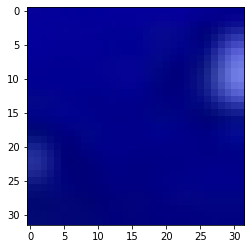

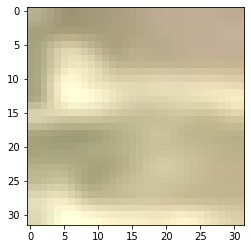

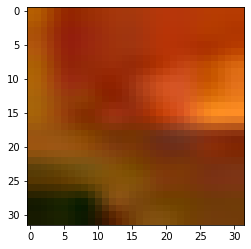

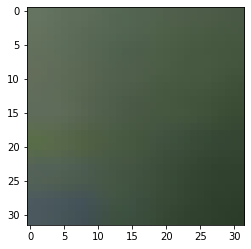

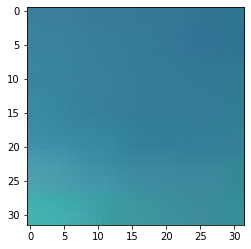

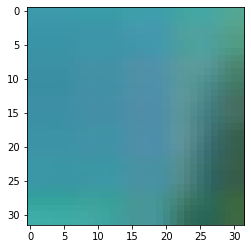

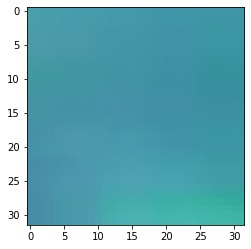

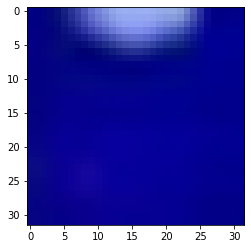

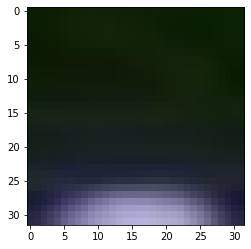

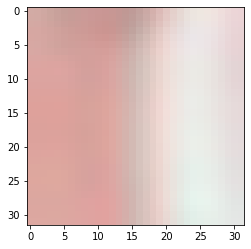

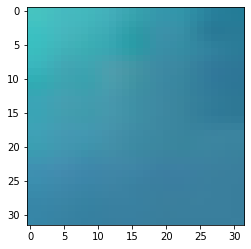

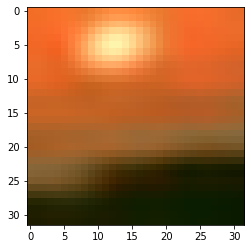

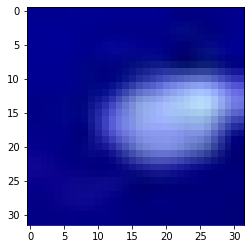

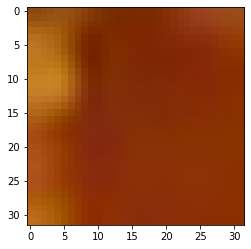

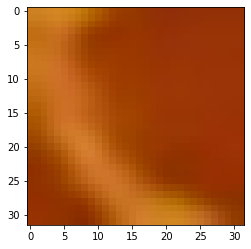

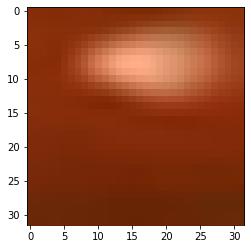

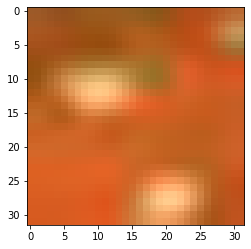

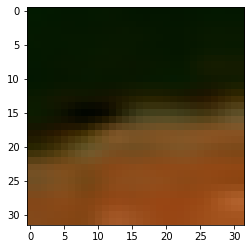

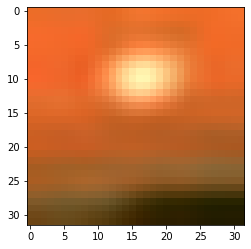

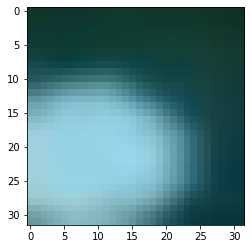

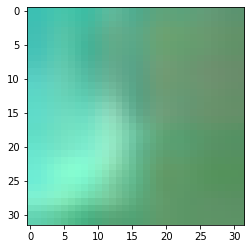

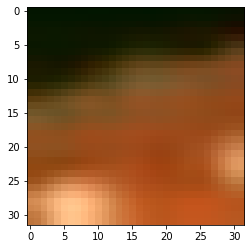

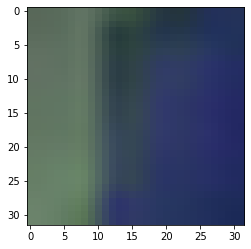

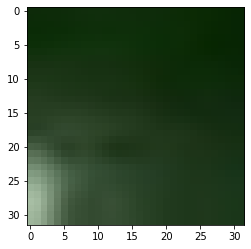

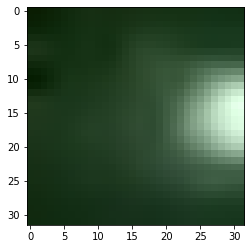

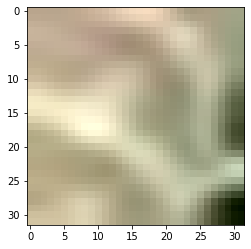

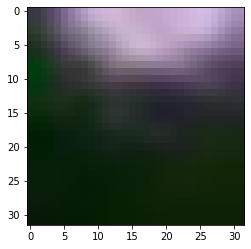

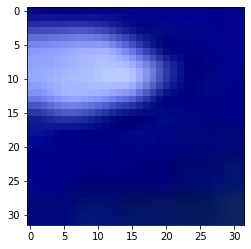

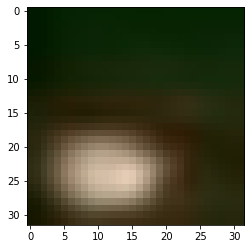

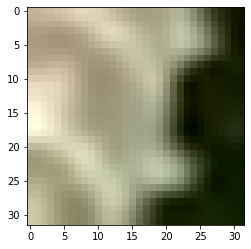

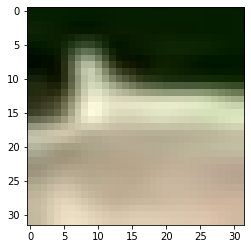

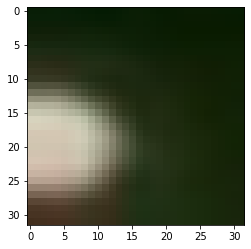

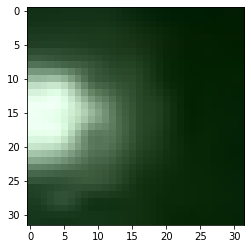

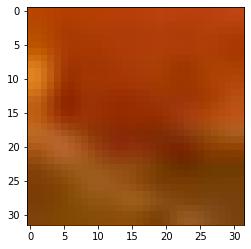

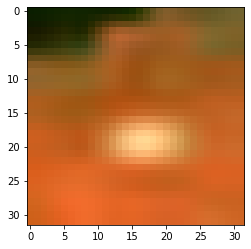

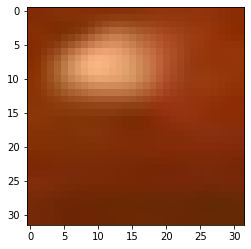

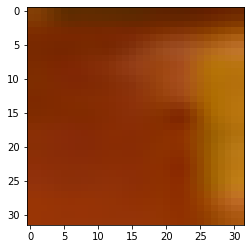

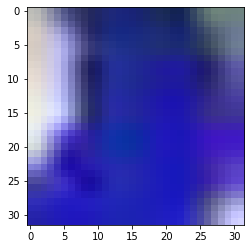

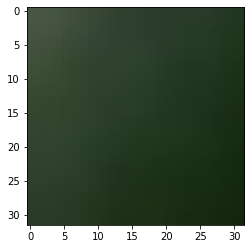

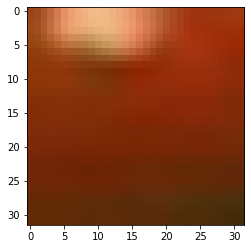

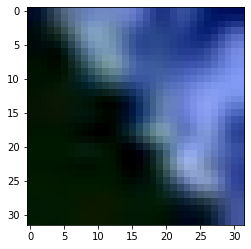

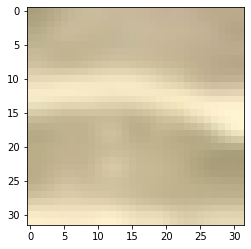

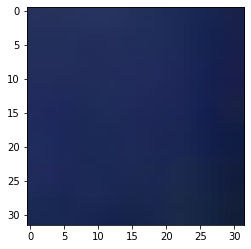

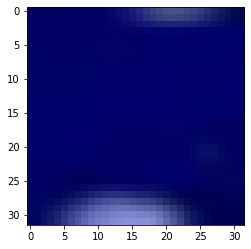

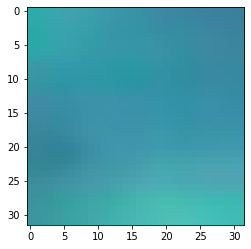

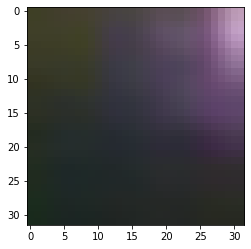

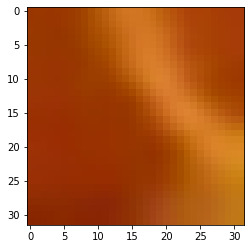

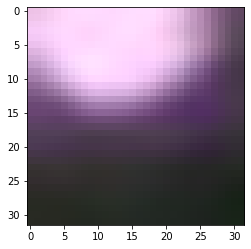

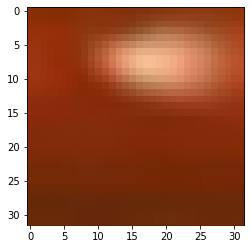

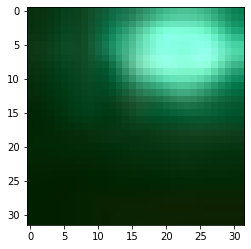

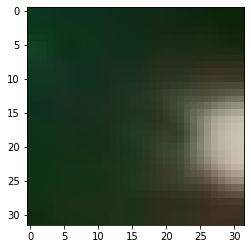

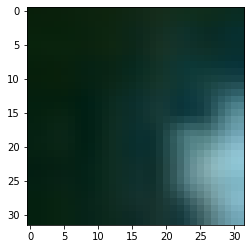

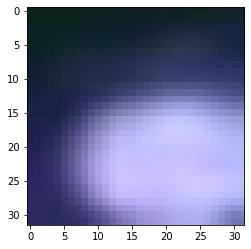

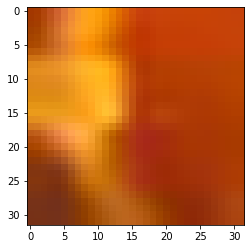

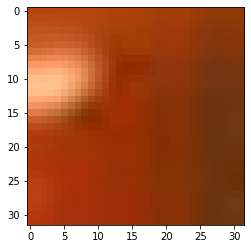

In [26]:
for i in x_test[y_test == 0][x_test[y_test == 0].mean(axis=(1, 2,3 )) > 0.15]:
    plt.figure()
    plt.imshow(i)